In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
# 1. Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
#define transform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [6]:
#load the train and test Datasets
import torch.utils.data.dataloader


train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [7]:
#define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

# Specify the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the 10000 test images: {100 * correct / total:.2f}%')




Epoch 1, Batch 100, Loss: 1.348
Epoch 1, Batch 200, Loss: 0.440
Epoch 1, Batch 300, Loss: 0.376
Epoch 1, Batch 400, Loss: 0.330
Epoch 1, Batch 500, Loss: 0.302
Epoch 1, Batch 600, Loss: 0.304
Epoch 1, Batch 700, Loss: 0.271
Epoch 1, Batch 800, Loss: 0.248
Epoch 1, Batch 900, Loss: 0.233
Epoch 2, Batch 100, Loss: 0.196
Epoch 2, Batch 200, Loss: 0.197
Epoch 2, Batch 300, Loss: 0.200
Epoch 2, Batch 400, Loss: 0.196
Epoch 2, Batch 500, Loss: 0.172
Epoch 2, Batch 600, Loss: 0.164
Epoch 2, Batch 700, Loss: 0.158
Epoch 2, Batch 800, Loss: 0.166
Epoch 2, Batch 900, Loss: 0.169
Epoch 3, Batch 100, Loss: 0.142
Epoch 3, Batch 200, Loss: 0.122
Epoch 3, Batch 300, Loss: 0.140
Epoch 3, Batch 400, Loss: 0.137
Epoch 3, Batch 500, Loss: 0.132
Epoch 3, Batch 600, Loss: 0.117
Epoch 3, Batch 700, Loss: 0.117
Epoch 3, Batch 800, Loss: 0.126
Epoch 3, Batch 900, Loss: 0.110
Epoch 4, Batch 100, Loss: 0.119
Epoch 4, Batch 200, Loss: 0.101
Epoch 4, Batch 300, Loss: 0.097
Epoch 4, Batch 400, Loss: 0.108
Epoch 4,

Epoch [1/5], Loss: 0.1712
Epoch [2/5], Loss: 0.0600
Epoch [3/5], Loss: 0.0426
Epoch [4/5], Loss: 0.0339
Epoch [5/5], Loss: 0.0275
Test Accuracy: 99.17%


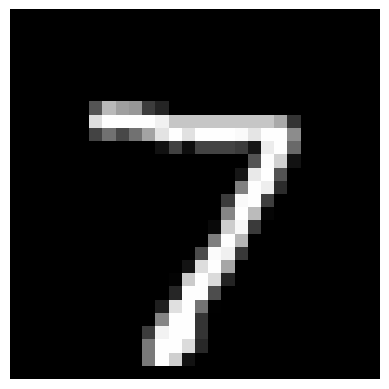

Predicted: 7, True: 7


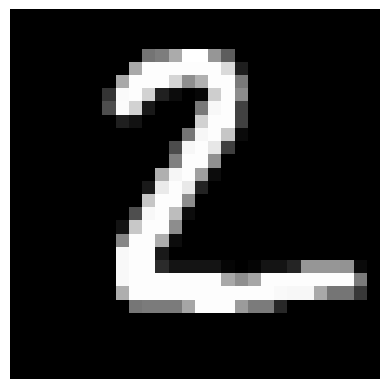

Predicted: 2, True: 2


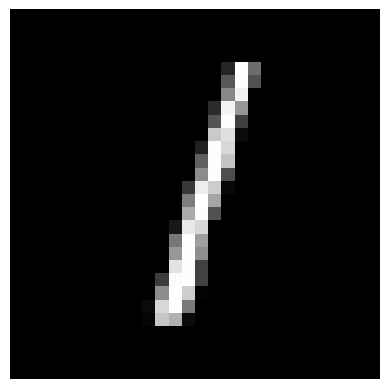

Predicted: 1, True: 1


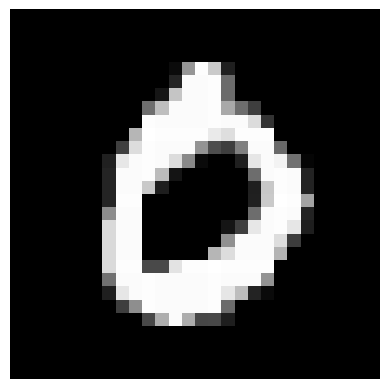

Predicted: 0, True: 0


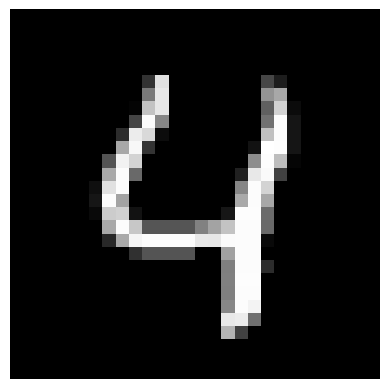

Predicted: 4, True: 4


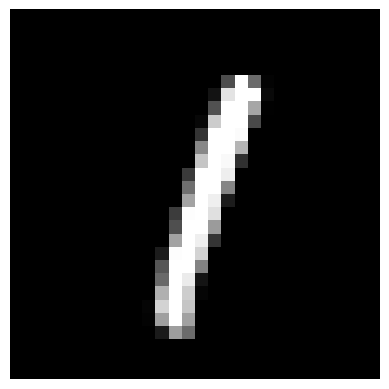

Predicted: 1, True: 1


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# -------------------------------------------
# 1. Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# -------------------------------------------
# 2. Define Transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to tensor [0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize MNIST
])

# -------------------------------------------
# 3. Load Dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# -------------------------------------------
# 4. Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # 1x28x28 -> 32x28x28
            nn.ReLU(),
            nn.MaxPool2d(2),                            # 32x28x28 -> 32x14x14

            nn.Conv2d(32, 64, kernel_size=3, padding=1),# -> 64x14x14
            nn.ReLU(),
            nn.MaxPool2d(2)                             # -> 64x7x7
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10)  # 10 classes for MNIST
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

model = CNN().to(device)

# -------------------------------------------
# 5. Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -------------------------------------------
# 6. Train the Model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

# -------------------------------------------
# 7. Evaluate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

# -------------------------------------------
# 8. Visualize Some Predictions
import numpy as np
def imshow(img):
    img = img * 0.3081 + 0.1307  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

data_iter = iter(test_loader)
images, labels = next(data_iter)
outputs = model(images.to(device))
_, predictions = torch.max(outputs, 1)

# Show 6 predictions
for i in range(6):
    imshow(images[i])
    print(f'Predicted: {predictions[i].item()}, True: {labels[i].item()}')


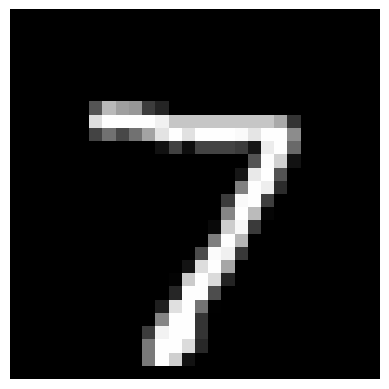

Predicted: 7, True: 7


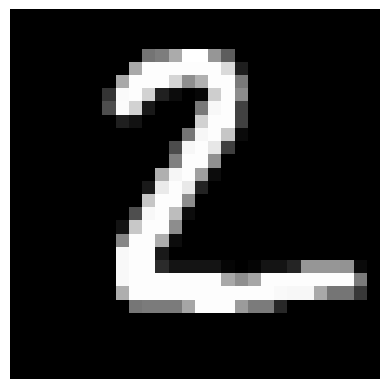

Predicted: 2, True: 2


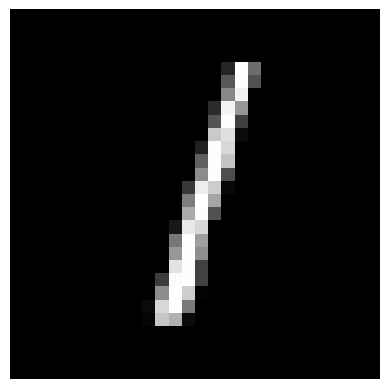

Predicted: 1, True: 1


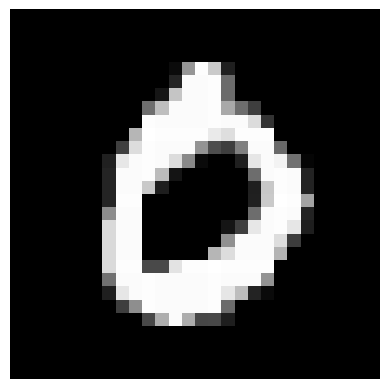

Predicted: 0, True: 0


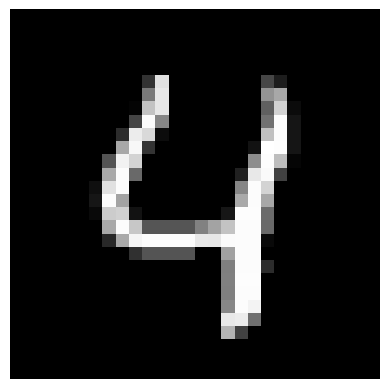

Predicted: 4, True: 4


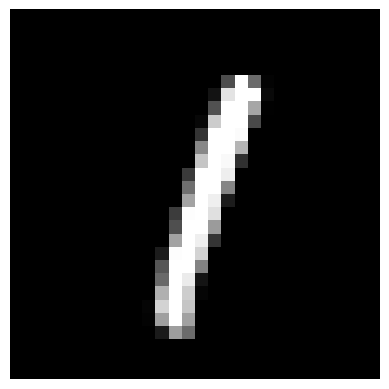

Predicted: 1, True: 1


In [8]:
import numpy as np
# 8. Visualize Some Predictions
def imshow(img):
    img = img * 0.3081 + 0.1307  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

data_iter = iter(test_loader)
images, labels = next(data_iter)
outputs = net(images.to(device))
_, predictions = torch.max(outputs, 1)

# Show 6 predictions
for i in range(6):
    imshow(images[i])
    print(f'Predicted: {predictions[i].item()}, True: {labels[i].item()}')